<a href="https://colab.research.google.com/github/05kaavya/Image_collusion/blob/main/Image_collusion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=9125c14e2f469da04ab2c6fd443eddc520738cda8790cbddb683092e018208b1
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [14]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [15]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [16]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [19]:
style_path = 'style.jpg'

In [22]:
content_path = tf.keras.utils.get_file('whitedog.jpg', 'https://hips.hearstapps.com/ghk.h-cdn.co/assets/16/08/gettyimages-530330473.jpg?crop=0.659xw:0.990xh;0.123xw,0.00779xh&resize=980:*')
style_path = tf.keras.utils.get_file('style.jpg','https://sonsuzdesign.files.wordpress.com/2021/06/pexels-frank-cone-3573555.jpg?w=1024')

149860/149860 [==============================] - 0s 0us/step


In [21]:
!curl -I https://sonsuzdesign.files.wordpress.com/2021/06/pexels-frank-cone-3573555.jpg?w=1024

HTTP/2 200 
server: nginx
date: Mon, 01 Apr 2024 03:09:02 GMT
content-type: image/jpeg
content-length: 149860
last-modified: Wed, 23 Jun 2021 00:15:46 GMT
expires: Wed, 08 May 2024 00:07:54 GMT
x-orig-src: 0_imageresize
vary: Accept
accept-ranges: bytes
access-control-allow-credentials: true
access-control-allow-origin: https://sonsuzdesign.wordpress.com
vary: Origin
x-nc: MISS bur 22 np
x-content-type-options: nosniff
alt-svc: h3=":443"; ma=86400



In [23]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [24]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

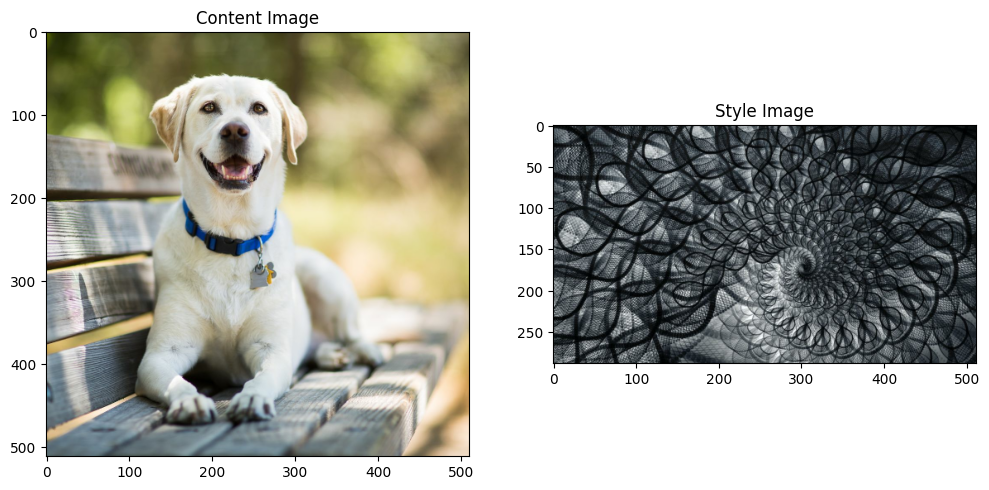

In [25]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

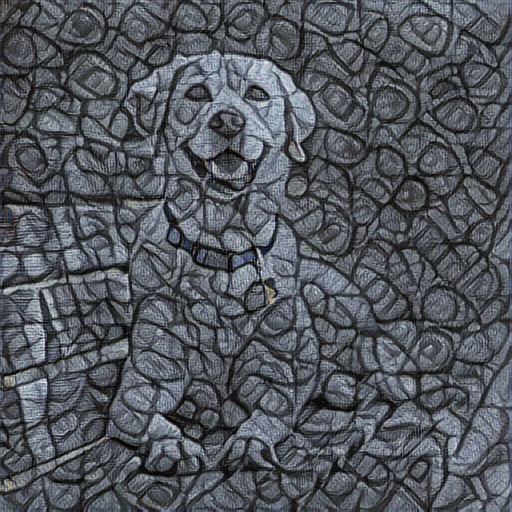

In [26]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)